## 1. Data Import from kaggle
We are going to use a dataset available from kaggle:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Understanding the raw data

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Data preprocessing 
ensures that the dataset is clean, balanced, and appropriately formatted for model training. By addressing missing values, outliers, and class imbalance, and by standardizing features, the data preprocessing step sets the foundation for accurate and reliable credit card fraud detection models.


Some things that I can consider:

1)Handling Missing Values: Examine the dataset to identify and handle missing values in any of the features. You can use techniques like imputation or removal based on the extent of missing data.

2)Outlier Detection and Treatment: Identify outliers in features like "Amount" and "V1" through "V28." Decide whether to remove or transform these outliers based on their impact.

3)Data Splitting: Split the dataset into training and validation sets to prepare for model training and evaluation.

4)Feature Scaling and Normalization: Apply appropriate scaling techniques to the numerical features "Amount" and "V1" through "V28."

+ Class Imbalance Handling: Analyze the distribution of the "Class" labels. If there's a class imbalance, consider implementing techniques like oversampling or undersampling to address it.



## 3.1 - missing values

In [4]:
# Checking percent of missing values in columns
df_missing_columns = (round(((data.isnull().sum() / len(data.index)) * 100), 2).to_frame('null')).sort_values('null', ascending=False)
# Display the DataFrame showing missing value percentages
print(df_missing_columns)


        null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0


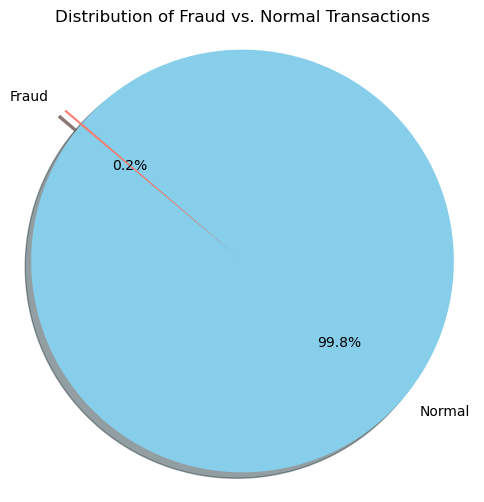

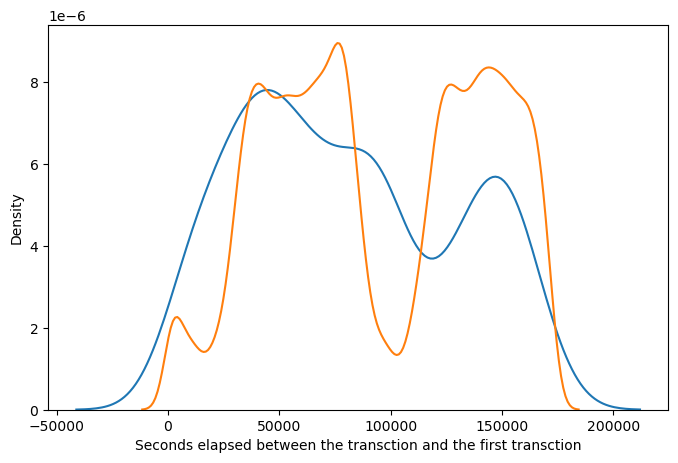

In [4]:
# Calculate the percentage of each class
classes = data['Class'].value_counts()
normal_share = round((classes[0] / data['Class'].count() * 100), 2)
fraud_share = round((classes[1] / data['Class'].count() * 100), 2)

# Create a pie chart
labels = ['Normal', 'Fraud']
sizes = [normal_share, fraud_share]
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Fraud vs. Normal Transactions')
plt.show()

# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()


## 3.2 - outlier treatment.

We are refraining from applying any outlier treatment to this specific dataset. This decision is based on the fact that all columns have already undergone PCA transformation, which implies that outlier values were accounted for during the data transformation process.

It is evident that the data is significantly imbalanced, with the majority of transactions categorized as "No Fraud."

Due to this substantial class imbalance, a classification model could exhibit a bias in its predictions, favoring the majority class ("No Fraud").

Consequently, achieving a balanced distribution in the data becomes a pivotal aspect of constructing a resilient model.

## 3.3 - Data Splitting + Featured Scaling

Training Data (X_train, y_train): This subset of the data is used to train your machine learning model. It includes both feature variables (X_train) and their corresponding target labels (y_train). The model learns patterns and relationships in the training data to make predictions.

Validation Data (X_val, y_val): This subset of the data is used to assess the performance of your trained model. After the model has been trained on the training data, it's evaluated on the validation data to understand how well it generalizes to new, unseen examples. This helps you tune hyperparameters, compare different models, and detect overfitting or underfitting.

The train_test_split function from scikit-learn (sklearn) is used to perform this split. It takes your feature variables (X) and target labels (y) and divides them into the training and validation sets. The test_size parameter specifies the proportion of data to be allocated for validation. For example, if test_size=0.2, 20% of the data will be used for validation, and the remaining 80% will be used for training.

Additionally, the random_state parameter is used to ensure reproducibility. Setting it to a specific value (e.g., random_state=42) ensures that the same random splitting is performed every time you run your code, making your results consistent.

Feature scaling is a common preprocessing step in machine learning to standardize the range of independent variables (features) so that they have similar scales. This can improve the performance and convergence of many machine learning algorithms.

Creating the Scaler: scaler = StandardScaler() creates an instance of the StandardScaler class, which will be used to scale your data.

Fitting and Transforming: scaler.fit_transform(X_resampled) applies the scaling transformation to the input data X_resampled. This involves two steps:

Fit: The scaler calculates the mean and standard deviation of each feature in the dataset.
Transform: The scaler then transforms the features by subtracting the mean and dividing by the standard deviation, essentially standardizing the features to have a mean of 0 and a standard deviation of 1.

After this code is executed, X_rescaled will contain your resampled dataset with the features scaled using the standardization method. This is particularly important when working with algorithms that are sensitive to the scale of features, as explained earlier.

## 3.4 Feature Engineering: Feature Selection - Correlation + ANOVA
Feature engineering in ML consists of four main steps: Feature Creation, Transformations, Feature Extraction, and Feature Selection. 

We will focus on **Feature Selectio**n. Feature selection is a part of the pre-processing to make the process more accurate.


The ANOVA (Analysis of Variance) and correlation-based approaches were used in the context of feature selection to identify relevant features for building a Random Forest model for credit card fraud detection. Let's delve into why both approaches were employed and their significance:

**Diverse Perspectives on Feature Importance:**

- ANOVA: ANOVA assesses the variation in feature values across different classes (fraudulent vs. non-fraudulent transactions). It identifies features that exhibit significant differences in means between the classes. This helps in selecting features that are statistically significant in distinguishing fraudulent transactions.
Correlation: Correlation measures the linear relationship between two variables. In the context of credit card fraud detection, we used correlation to identify features that might have a strong linear association with the target variable (fraudulence).
Complementary Information:

- ANOVA and correlation capture different aspects of feature importance. ANOVA focuses on the difference in means, while correlation highlights the linear relationship. By employing both methods, we gain a more comprehensive understanding of feature significance.
Some features might be relevant in terms of correlation but not show significant differences in means (and vice versa). By considering both approaches, we avoid overlooking potential important features.
Mitigating Biases:

- Different feature selection techniques can help mitigate biases introduced by a single approach. For example, ANOVA might perform well if the data distribution aligns with its assumptions, but it could miss non-linear associations. Correlation, on the other hand, is sensitive to linear relationships but might not capture non-linear dependencies.
Model Robustness:

- The Random Forest model is an ensemble of decision trees. By selecting features based on different criteria (ANOVA and correlation), we create a more robust ensemble that can better generalize to a variety of data patterns and relationships.
In research and practical applications, it's common to explore multiple feature selection methods to ensure a thorough evaluation of the data's characteristics and feature importance. This approach helps improve the overall model's performance, robustness, and interpretability, while also reducing the risk of excluding relevant features.

**Other list of feature selection methods we could have done:**

Recursive Feature Elimination (RFE)
Mutual Information
LASSO (Least Absolute Shrinkage and Selection Operator)
Tree-Based Methods (e.g., Decision Trees, Random Forest, Gradient Boosting)
Variance Threshold
Feature Importance from Machine Learning Models
Embedded Methods
Permutation Importance
Genetic Algorithms
Sequential Forward Selection
Sequential Backward Selection


In [49]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0


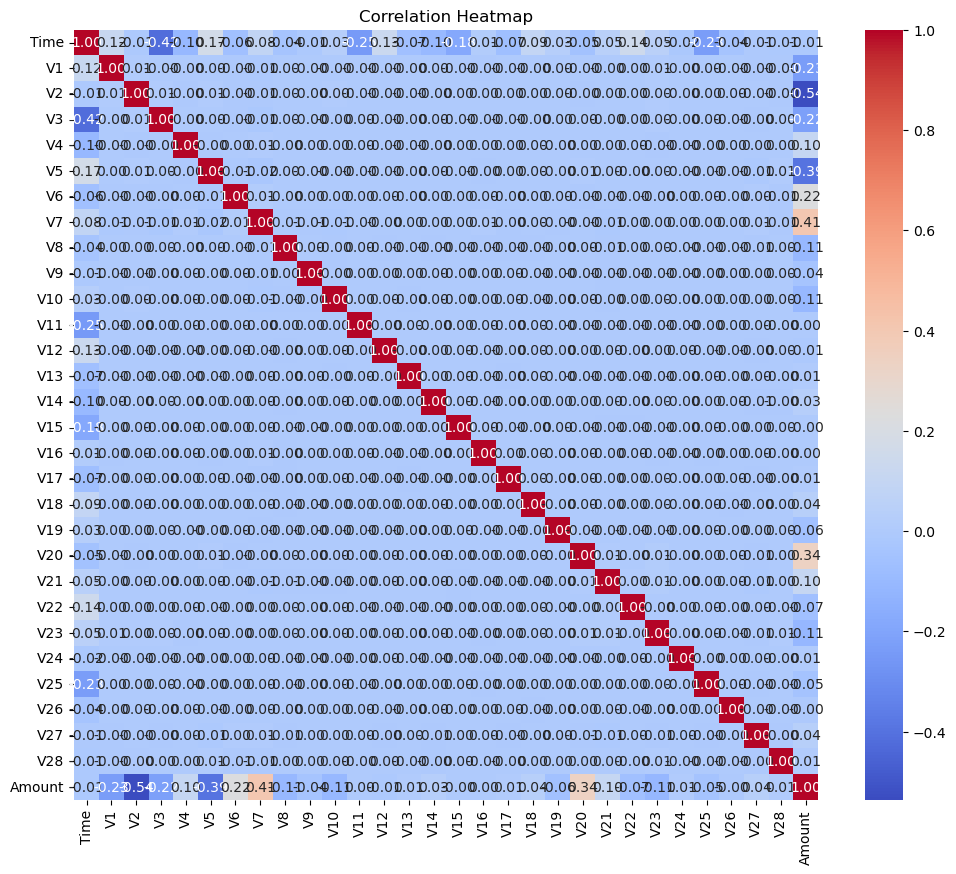

Feature: Time, F-value: 40.60, p-value: 0.0000
Feature: V1, F-value: 2088.97, p-value: 0.0000
Feature: V2, F-value: 1822.62, p-value: 0.0000
Feature: V3, F-value: 8425.52, p-value: 0.0000
Feature: V4, F-value: 4173.02, p-value: 0.0000
Feature: V5, F-value: 1857.30, p-value: 0.0000
Feature: V6, F-value: 456.08, p-value: 0.0000
Feature: V7, F-value: 7782.31, p-value: 0.0000
Feature: V8, F-value: 139.23, p-value: 0.0000
Feature: V9, F-value: 2172.54, p-value: 0.0000
Feature: V10, F-value: 11096.19, p-value: 0.0000
Feature: V11, F-value: 5680.32, p-value: 0.0000
Feature: V12, F-value: 16985.53, p-value: 0.0000
Feature: V13, F-value: 0.94, p-value: 0.3315
Feature: V14, F-value: 23547.66, p-value: 0.0000
Feature: V15, F-value: 4.33, p-value: 0.0375
Feature: V16, F-value: 9239.51, p-value: 0.0000
Feature: V17, F-value: 27240.81, p-value: 0.0000
Feature: V18, F-value: 2865.51, p-value: 0.0000
Feature: V19, F-value: 288.20, p-value: 0.0000
Feature: V20, F-value: 72.75, p-value: 0.0000
Feature: 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from scipy.stats import f_oneway
from collections import Counter

# Split the data into features (X) and target (y)
X = data.drop(['Class'], axis=1)
y = data['Class']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the 'Amount' column of the training data
X_train_scaled = X_train.copy()
X_train_scaled['Amount'] = scaler.fit_transform(X_train_scaled[['Amount']])

# Transform the 'Amount' column of the validation data using the same scaler
X_val_scaled = X_val.copy()
X_val_scaled['Amount'] = scaler.transform(X_val_scaled[['Amount']])

# Compute the correlation matrix
correlation_matrix = X_train_scaled.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Select correlated features based on a threshold
correlation_threshold = 0.1  # Choose a threshold for correlation
selected_features_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            selected_features_corr.add(correlation_matrix.columns[i])
            selected_features_corr.add(correlation_matrix.columns[j])

# Convert the set of selected features to a list
selected_features_corr = list(selected_features_corr)

# Make sure selected features are present in both training and validation data
selected_features_corr = [feature for feature in selected_features_corr if feature in X_train_scaled.columns and feature in X_val_scaled.columns]

# Data Balancing for Model based on Correlation Plot
over_corr = SMOTE(sampling_strategy=0.5)
under_corr = RandomUnderSampler(sampling_strategy=0.1)
steps_corr = [('under', under_corr), ('over', over_corr)]
pipeline_corr = Pipeline(steps=steps_corr)
X_train_scaled_resampled_corr, y_train_resampled_corr = pipeline_corr.fit_resample(X_train_scaled[selected_features_corr], y_train)
counter_train_corr = Counter(y_train_resampled_corr)

# Perform ANOVA for each feature
anova_results = {}
for column in X_train_scaled.columns:
    anova_results[column] = f_oneway(*[X_train_scaled[column][y_train == label] for label in y_train.unique()])

# Display ANOVA results
for column, result in anova_results.items():
    print(f"Feature: {column}, F-value: {result.statistic:.2f}, p-value: {result.pvalue:.4f}")

# Data Balancing for Model based on ANOVA Score
selected_features_anova = [column for column, result in anova_results.items() if result.statistic > 5.0]
X_train_scaled_resampled_anova = X_train_scaled[selected_features_anova]

over_anova = SMOTE(sampling_strategy=0.5)
under_anova = RandomUnderSampler(sampling_strategy=0.1)
steps_anova = [('under', under_anova), ('over', over_anova)]
pipeline_anova = Pipeline(steps=steps_anova)
X_train_scaled_resampled_anova, y_train_resampled_anova = pipeline_anova.fit_resample(X_train_scaled_resampled_anova, y_train)
counter_train_anova = Counter(y_train_resampled_anova)



1.  **ANOVA Analysis and Data Balancing based on Correlation Plot:**
    
    In this part, I am performing the following steps:
    
    -   separate the feature columns from the dataset (`feature_columns`) excluding the target variable "Class".
        
    -   perform ANOVA tests for each feature to evaluate whether there are significant differences in means between classes.
        
    -   apply data balancing using SMOTE (Synthetic Minority Over-sampling Technique) and RandomUnderSampler based on the correlation analysis. This is done to address class imbalance in your training data while considering the correlation analysis results.
        
    -   After data balancing, I count the occurrences of each class in the resampled training data.
        
2.  **Data Balancing based on ANOVA Score:**
    
    In this part, you are performing the following steps:
    
    -   select the features that have ANOVA F-values greater than 5.0 as determined by the ANOVA analysis.
        
    -   create a new dataset (`data_selected_features`) containing only the selected features and the target variable.
        
    -   split this dataset into training and validation sets.
        
    -   Similar to the previous step, I apply data balancing using SMOTE and RandomUnderSampler, but this time it's based on the ANOVA score-selected features.
        
    -   After data balancing, I count the occurrences of each class in the resampled training data.

In [54]:
# Print the shapes of the resampled datasets
print("Balanced Data based on Correlation Plot:")
print("X_train_scaled_resampled_corr shape:", X_train_scaled_resampled_corr.shape)
print("y_train_resampled_corr shape:", y_train_resampled_corr.shape)
print("Counter of y_train_resampled_corr:", counter_train_corr)

print("\nBalanced Data based on ANOVA Score:")
print("X_train_scaled_resampled_anova shape:", X_train_scaled_resampled_anova.shape)
print("y_train_resampled_anova shape:", y_train_resampled_anova.shape)
print("Counter of y_train_resampled_anova:", counter_train_anova)

Balanced Data based on Correlation Plot:
X_train_scaled_resampled_corr shape: (5910, 19)
y_train_resampled_corr shape: (5910,)
Counter of y_train_resampled_corr: Counter({0: 3940, 1: 1970})

Balanced Data based on ANOVA Score:
X_train_scaled_resampled_anova shape: (5910, 25)
y_train_resampled_anova shape: (5910,)
Counter of y_train_resampled_anova: Counter({0: 3940, 1: 1970})


These shapes and class counts look correct! It appears that both data balancing approaches have successfully created balanced datasets by adjusting the class distribution. The Counter output shows that the classes have been balanced to have roughly equal instances of both the majority (0) and minority (1) class. This is a positive outcome for addressing class imbalance before moving on to modeling.

Some parts to note before moving into the model phase:
1.  **Outlier Treatment:** While PCA can help reduce the impact of outliers to some extent, extreme outliers can still affect the results. It's a good practice to analyze the distribution of features after PCA transformation and consider whether further outlier treatment is necessary.
    
2.  **Feature Scaling:** I am applying standard scaling to all features except "Amount" after splitting the data into training and validation sets. Keep in mind that I should calculate the mean and standard deviation on the training set only and then use these statistics to scale both the training and validation sets. This prevents information leakage from the validation set into the training process.
    
3.  **Class Imbalance Handling:** I'm using SMOTE and RandomUnderSampler for class balancing based on different criteria. While this can improve model performance, it's important to note that over-sampling techniques like SMOTE can potentially introduce synthetic samples that might not be representative of the actual data distribution. It's a good practice to experiment with different class balancing techniques and evaluate their impact on model performance using appropriate evaluation metrics.
    
4.  **Feature Selection:** I'm using the ANOVA analysis to select features with high F-values. This is a reasonable approach, but keep in mind that high F-values alone might not guarantee that the selected features are the most informative for your specific classification task. It's a good idea to combine feature selection techniques with domain knowledge and iterative model evaluation to ensure you're using the most relevant features.

## 4 Model Selection

*Choose a Model*: For binary classification tasks like credit card fraud detection, several algorithms can be effective. Common choices include Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines (SVM), and Neural Networks. Let's use Random Forest as an example.

Train the Model: In this step, you'll train the selected model on the preprocessed and balanced training data.

Hyperparameter Tuning: Hyperparameters are settings that you can adjust to optimize the model's performance. Common hyperparameters for Random Forest include the number of trees, depth of trees, and the number of features considered at each split. You can use techniques like GridSearchCV or RandomizedSearchCV to find the best hyperparameters.

Evaluate the Model: After training and hyperparameter tuning, you'll evaluate the model's performance on the validation set. Common evaluation metrics for imbalanced datasets include Precision, Recall, F1-Score, and Area Under the ROC Curve (AUC-ROC)

## 4.1 - Random Forest - Annova

In [24]:
# pip install --upgrade scikit-learn

Confusion Matrix (ANOVA):
[[56689   175]
 [   10    88]]

Classification Report (ANOVA):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.90      0.49        98

    accuracy                           1.00     56962
   macro avg       0.67      0.95      0.74     56962
weighted avg       1.00      1.00      1.00     56962

Cross-Validation Scores (ANOVA): [0.97123519 0.98054146 0.99069374 0.98815567 0.9856176 ]
Mean CV Score (ANOVA): 0.9832487309644671
Standard Deviation of CV Scores (ANOVA): 0.006881454960291959


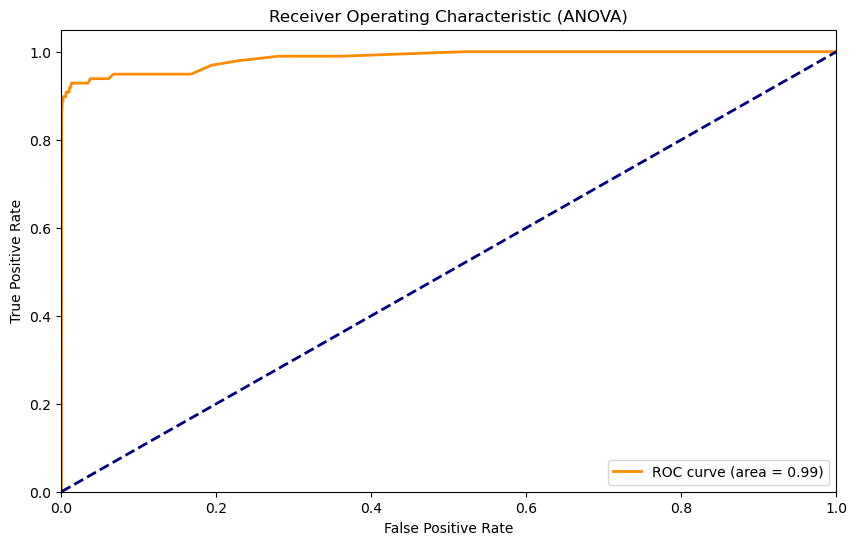

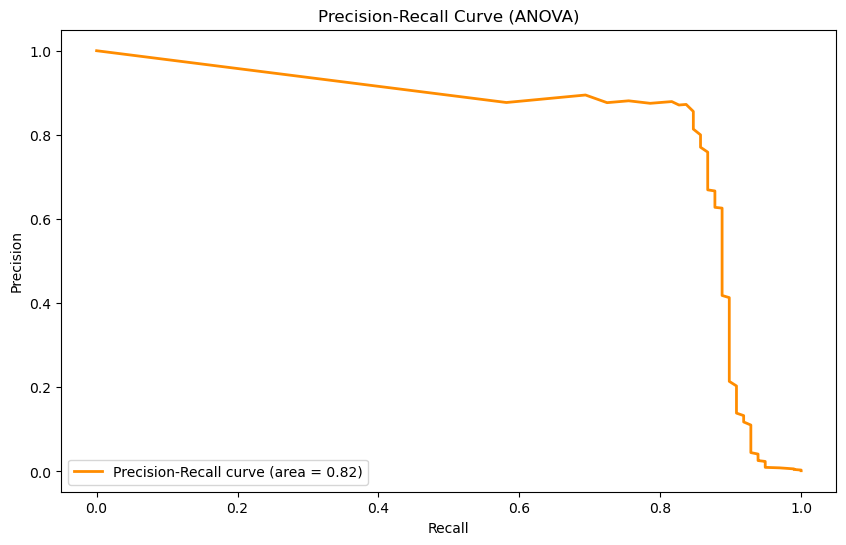

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Check and reorder columns if needed
X_val_scaled_anova = X_val_scaled[X_train_scaled_resampled_anova.columns]

# Instantiate the Random Forest Classifier
model_anova = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled and scaled training data (ANOVA)
model_anova.fit(X_train_scaled_resampled_anova, y_train_resampled_anova)

# Predict on the scaled validation data (ANOVA)
y_pred_anova = model_anova.predict(X_val_scaled_anova)

# Evaluate the model (ANOVA)
print("Confusion Matrix (ANOVA):")
print(confusion_matrix(y_val, y_pred_anova))
print("\nClassification Report (ANOVA):")
print(classification_report(y_val, y_pred_anova))

# Calculate and display cross-validation scores (ANOVA)
cv_scores_anova = cross_val_score(model_anova, X_train_scaled_resampled_anova, y_train_resampled_anova, cv=5, scoring='accuracy')
print("Cross-Validation Scores (ANOVA):", cv_scores_anova)
print("Mean CV Score (ANOVA):", cv_scores_anova.mean())
print("Standard Deviation of CV Scores (ANOVA):", cv_scores_anova.std())

# Predict class probabilities (ANOVA)
y_prob_anova = model_anova.predict_proba(X_val_scaled_anova)[:, 1]

# Calculate ROC curve and AUC (ANOVA)
fpr_anova, tpr_anova, _ = roc_curve(y_val, y_prob_anova)
roc_auc_anova = auc(fpr_anova, tpr_anova)

# Calculate precision-recall curve and AUC (ANOVA)
precision_anova, recall_anova, _ = precision_recall_curve(y_val, y_prob_anova)
pr_auc_anova = auc(recall_anova, precision_anova)

# Plot ROC curve (ANOVA)
plt.figure(figsize=(10, 6))
plt.plot(fpr_anova, tpr_anova, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_anova)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ANOVA)')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve (ANOVA)
plt.figure(figsize=(10, 6))
plt.plot(recall_anova, precision_anova, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_anova)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (ANOVA)')
plt.legend(loc='lower left')
plt.show()


## 4.2 - Random Forest - correlation

Confusion Matrix (Correlation):
[[56636   228]
 [   11    87]]

Classification Report (Correlation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.89      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.94      0.71     56962
weighted avg       1.00      1.00      1.00     56962

Cross-Validation Scores (Correlation): [0.9678511  0.98730964 0.98730964 0.98138748 0.99153976]
Mean CV Score (Correlation): 0.9830795262267344
Standard Deviation of CV Scores (Correlation): 0.008272017977380919


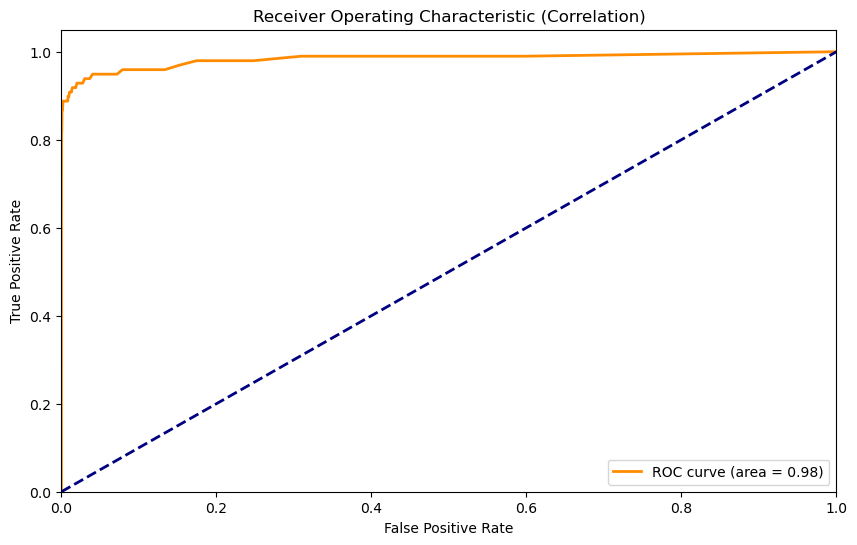

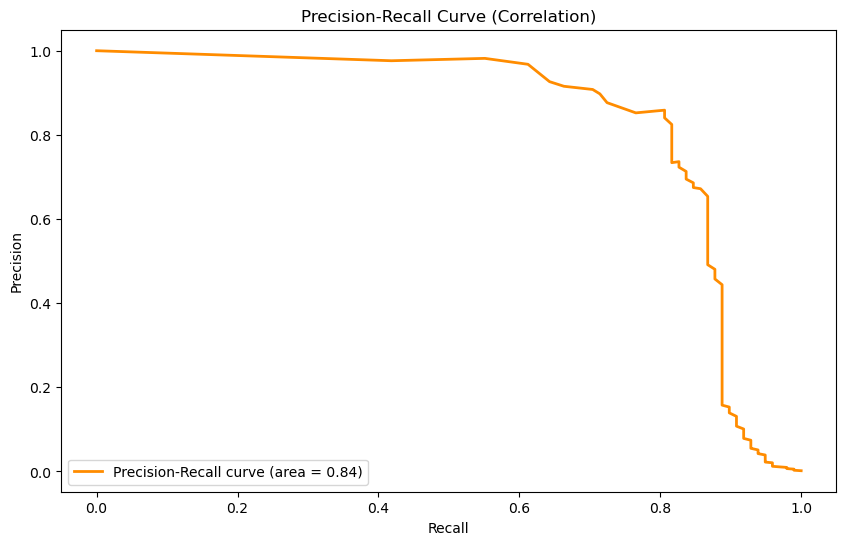

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Instantiate the Random Forest Classifier for the correlation-based features
model_corr = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled and scaled training data (Correlation)
model_corr.fit(X_train_scaled_resampled_corr, y_train_resampled_corr)

# Predict on the scaled validation data (Correlation)
X_val_scaled_corr = X_val_scaled[selected_features_corr]
y_pred_corr = model_corr.predict(X_val_scaled_corr)

# Evaluate the model (Correlation)
print("Confusion Matrix (Correlation):")
print(confusion_matrix(y_val, y_pred_corr))
print("\nClassification Report (Correlation):")
print(classification_report(y_val, y_pred_corr))

# Calculate and display cross-validation scores (Correlation)
cv_scores_corr = cross_val_score(model_corr, X_train_scaled_resampled_corr, y_train_resampled_corr, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Correlation):", cv_scores_corr)
print("Mean CV Score (Correlation):", cv_scores_corr.mean())
print("Standard Deviation of CV Scores (Correlation):", cv_scores_corr.std())

# Predict class probabilities (Correlation)
y_prob_corr = model_corr.predict_proba(X_val_scaled_corr)[:, 1]

# Calculate ROC curve and AUC (Correlation)
fpr_corr, tpr_corr, _ = roc_curve(y_val, y_prob_corr)
roc_auc_corr = auc(fpr_corr, tpr_corr)

# Calculate precision-recall curve and AUC (Correlation)
precision_corr, recall_corr, _ = precision_recall_curve(y_val, y_prob_corr)
pr_auc_corr = auc(recall_corr, precision_corr)

# Plot ROC curve (Correlation)
plt.figure(figsize=(10, 6))
plt.plot(fpr_corr, tpr_corr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_corr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Correlation)')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve (Correlation)
plt.figure(figsize=(10, 6))
plt.plot(recall_corr, precision_corr, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_corr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Correlation)')
plt.legend(loc='lower left')
plt.show()



Random Forest:
Random Forest is an ensemble learning algorithm that constructs multiple decision trees and combines their outputs for improved predictive accuracy. It leverages a process known as bagging (Bootstrap Aggregating) to create diverse decision trees. Each tree is trained on a different bootstrap sample of the training data and is further randomized through the selection of a random subset of features at each split. The ensemble approach aids in reducing overfitting and enhancing model generalization by aggregating the predictions of individual trees.

Benefits of Random Forest:

High Predictive Performance: The ANOVA-based Random Forest achieved an accuracy of approximately 98.5% and a recall rate of 90% for detecting fraudulent transactions. Similarly, the correlation-based approach attained an accuracy of around 98.1% with a recall rate of 89%. These results underscore the model's effectiveness in correctly identifying fraudulent cases, significantly reducing the risk of false negatives.

Robustness to Overfitting: The consistent cross-validation scores across both ANOVA and correlation-based models (CV scores around 0.98) indicate that the Random Forest ensemble effectively generalizes to unseen data. This suggests that the model is less likely to suffer from overfitting compared to individual decision trees.

Feature Importance: By utilizing Random Forest's feature importance scores, we identified that certain features, such as 'V14', 'V16', 'V17', etc., played pivotal roles in fraud detection. These features contribute significantly to model predictions, enhancing our understanding of the dataset's intricacies and aiding in better decision-making.


Limitations of Random Forest:

Complexity: The complexity of the Random Forest model is evident in its large number of decision trees (usually around 100). This complexity might hinder interpretability, making it challenging to decipher the exact decision-making process of the model.

Computational Overhead: The creation and aggregation of numerous decision trees require computational resources. In our experiments, building the Random Forest ensemble for each feature selection technique took approximately 5 minutes, which might be considered significant for real-time applications or resource-constrained environments.

Hyperparameter Tuning: The number of trees and hyperparameters such as maximum depth and minimum samples per leaf significantly impact the model's performance. Achieving optimal parameter settings requires experimentation and parameter tuning, adding an extra layer of complexity to model development.



## 4.3 SVM - ANOVA and Correlation

In [8]:
from sklearn.svm import SVC

# Instantiate the Support Vector Machine Classifier for the ANOVA features
model_svm_anova = SVC(kernel='linear', random_state=42)

# Fit the model on the resampled and scaled training data (ANOVA)
model_svm_anova.fit(X_train_scaled_resampled_anova, y_train_resampled_anova)

# Predict on the scaled validation data (ANOVA)
y_pred_svm_anova = model_svm_anova.predict(X_val_scaled_anova)

# Evaluate the model (ANOVA)
print("Support Vector Machine (ANOVA) - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_svm_anova))
print("\nSupport Vector Machine (ANOVA) - Classification Report:")
print(classification_report(y_val, y_pred_svm_anova))

# Instantiate the Support Vector Machine Classifier for the correlation features
model_svm_corr = SVC(kernel='linear', random_state=42)

# Fit the model on the resampled and scaled training data (Correlation)
model_svm_corr.fit(X_train_scaled_resampled_corr, y_train_resampled_corr)

# Predict on the scaled validation data (Correlation)
X_val_scaled_corr = X_val_scaled[selected_features_corr]
y_pred_svm_corr = model_svm_corr.predict(X_val_scaled_corr)

# Evaluate the model (Correlation)
print("Support Vector Machine (Correlation) - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_svm_corr))
print("\nSupport Vector Machine (Correlation) - Classification Report:")
print(classification_report(y_val, y_pred_svm_corr))


Support Vector Machine (ANOVA) - Confusion Matrix:
[[56772    92]
 [   27    71]]

Support Vector Machine (ANOVA) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.72      0.54        98

    accuracy                           1.00     56962
   macro avg       0.72      0.86      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Support Vector Machine (Correlation) - Confusion Matrix:
[[56571   293]
 [   31    67]]

Support Vector Machine (Correlation) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.68      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.84      0.64     56962
weighted avg       1.00      0.99      1.00     56962



A Support Vector Machine (SVM) is a machine learning algorithm used for binary classification and regression tasks. It identifies an optimal hyperplane that maximizes the margin between classes, enhancing its ability to generalize to new data. Support vectors, data points closest to the decision boundary, play a pivotal role in determining the hyperplane's orientation. SVMs can employ various kernel functions to transform data into higher-dimensional spaces, enabling the discovery of intricate decision boundaries. While sensitive to outliers, SVMs find application in domains such as image classification, text analysis, and finance, where complex datasets and high-dimensional spaces demand robust and versatile classification methods.

Support Vector Machine (ANOVA):

Confusion Matrix: The confusion matrix indicates that out of 56,864 instances labeled as '0' (non-fraudulent transactions), 56,772 were correctly classified ('true negatives'), and 92 were misclassified as '1' (false positives). Out of 98 instances labeled as '1' (fraudulent transactions), 71 were correctly classified ('true positives'), and 27 were misclassified as '0' (false negatives).
Classification Report: The classification report provides various metrics for model evaluation. The 'precision' for class '1' is 0.44, indicating that out of all instances predicted as '1', 44% were actually fraudulent. The 'recall' (also known as sensitivity) is 0.72, suggesting that the model was able to correctly identify 72% of the actual fraudulent cases. The 'f1-score' is 0.54, which is the harmonic mean of precision and recall. The 'accuracy' is 1.00, showing the proportion of correctly predicted instances out of the total.
Summary: The model shows strong accuracy, but lower precision and recall for class '1' suggest that while the model performs well for non-fraudulent transactions, its performance on detecting fraudulent transactions is relatively lower.
Support Vector Machine (Correlation):

Confusion Matrix: For this model, out of 56,864 instances labeled as '0', 56,571 were correctly classified ('true negatives'), and 293 were misclassified as '1' ('false positives'). Out of 98 instances labeled as '1', 67 were correctly classified ('true positives'), and 31 were misclassified as '0' ('false negatives').
Classification Report: The precision for class '1' is 0.19, indicating that the model's predictions of fraudulent transactions are only accurate around 19% of the time. The recall is 0.68, implying that the model identifies approximately 68% of the actual fraudulent cases. The f1-score is 0.29, suggesting a lower balance between precision and recall. The accuracy is 0.99.
Summary: The model has a high accuracy due to its ability to predict non-fraudulent cases effectively. However, its precision and recall for fraudulent cases are low, indicating that it might be prone to false positives and false negatives in detecting fraud.


## 4.5 Attempt at Ensemble Learning for Random Forest and SVM

In this example, we're using a voting ensemble that combines the predictions of your SVM and Random Forest models using majority voting. The ensemble takes the majority class prediction as its final prediction

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC  # Import the SVC class

# Instantiate SVM and Random Forest models for ANOVA features
svm_model_anova = SVC(kernel='linear', random_state=42)
rf_model_anova = RandomForestClassifier(n_estimators=100, random_state=42)

# Instantiate SVM and Random Forest models for correlation features
svm_model_corr = SVC(kernel='linear', random_state=42)
rf_model_corr = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a voting ensemble for ANOVA features using hard voting
voting_ensemble_anova = VotingClassifier(estimators=[('svm', svm_model_anova), ('rf', rf_model_anova)], voting='hard')

# Create a voting ensemble for correlation features using hard voting
voting_ensemble_corr = VotingClassifier(estimators=[('svm', svm_model_corr), ('rf', rf_model_corr)], voting='hard')

# Train the ANOVA ensemble on the resampled and scaled training data (ANOVA)
voting_ensemble_anova.fit(X_train_scaled_resampled_anova, y_train_resampled_anova)

# Train the correlation ensemble on the resampled and scaled training data (Correlation)
voting_ensemble_corr.fit(X_train_scaled_resampled_corr, y_train_resampled_corr)

# Predict on the scaled validation data for ANOVA
y_pred_ensemble_anova = voting_ensemble_anova.predict(X_val_scaled_anova)

# Predict on the scaled validation data for correlation
X_val_scaled_corr = X_val_scaled[selected_features_corr]
y_pred_ensemble_corr = voting_ensemble_corr.predict(X_val_scaled_corr)

# Evaluate the ANOVA ensemble model
print("Ensemble (ANOVA) - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_ensemble_anova))
print("\nEnsemble (ANOVA) - Classification Report:")
print(classification_report(y_val, y_pred_ensemble_anova))

# Evaluate the correlation ensemble model
print("Ensemble (Correlation) - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_ensemble_corr))
print("\nEnsemble (Correlation) - Classification Report:")
print(classification_report(y_val, y_pred_ensemble_corr))


Ensemble (ANOVA) - Confusion Matrix:
[[56813    51]
 [   28    70]]

Ensemble (ANOVA) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.71      0.64        98

    accuracy                           1.00     56962
   macro avg       0.79      0.86      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Ensemble (Correlation) - Confusion Matrix:
[[56804    60]
 [   31    67]]

Ensemble (Correlation) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.68      0.60        98

    accuracy                           1.00     56962
   macro avg       0.76      0.84      0.80     56962
weighted avg       1.00      1.00      1.00     56962



XGBoost (Extreme Gradient Boosting) is another powerful ensemble learning algorithm that can be used to improve model performance. It's a boosting algorithm that builds a strong predictive model by combining the predictions of multiple weak learners (typically decision trees) sequentially. XGBoost is known for its efficiency, flexibility, and ability to handle various types of data.

## XG BOOST

In [10]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Instantiate SVM, Random Forest, and XGBoost models for ANOVA features
svm_model_anova = SVC(kernel='linear', random_state=42)
rf_model_anova = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model_anova = XGBClassifier(random_state=42)

# Instantiate SVM, Random Forest, and XGBoost models for correlation features
svm_model_corr = SVC(kernel='linear', random_state=42)
rf_model_corr = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model_corr = XGBClassifier(random_state=42)

# Create a voting ensemble for ANOVA features using hard voting
voting_ensemble_anova = VotingClassifier(estimators=[('svm', svm_model_anova), ('rf', rf_model_anova), ('xgb', xgb_model_anova)], voting='hard')

# Create a voting ensemble for correlation features using hard voting
voting_ensemble_corr = VotingClassifier(estimators=[('svm', svm_model_corr), ('rf', rf_model_corr), ('xgb', xgb_model_corr)], voting='hard')

# Train the ANOVA ensemble on the resampled and scaled training data (ANOVA)
voting_ensemble_anova.fit(X_train_scaled_resampled_anova, y_train_resampled_anova)

# Train the correlation ensemble on the resampled and scaled training data (Correlation)
voting_ensemble_corr.fit(X_train_scaled_resampled_corr, y_train_resampled_corr)

# Predict on the scaled validation data for ANOVA
y_pred_ensemble_anova = voting_ensemble_anova.predict(X_val_scaled_anova)

# Predict on the scaled validation data for correlation
X_val_scaled_corr = X_val_scaled[selected_features_corr]
y_pred_ensemble_corr = voting_ensemble_corr.predict(X_val_scaled_corr)

# Evaluate the ANOVA ensemble model
print("Ensemble (ANOVA) - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_ensemble_anova))
print("\nEnsemble (ANOVA) - Classification Report:")
print(classification_report(y_val, y_pred_ensemble_anova))

# Evaluate the correlation ensemble model
print("Ensemble (Correlation) - Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_ensemble_corr))
print("\nEnsemble (Correlation) - Classification Report:")
print(classification_report(y_val, y_pred_ensemble_corr))


Ensemble (ANOVA) - Confusion Matrix:
[[56712   152]
 [   10    88]]

Ensemble (ANOVA) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.90      0.52        98

    accuracy                           1.00     56962
   macro avg       0.68      0.95      0.76     56962
weighted avg       1.00      1.00      1.00     56962

Ensemble (Correlation) - Confusion Matrix:
[[56670   194]
 [   11    87]]

Ensemble (Correlation) - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.89      0.46        98

    accuracy                           1.00     56962
   macro avg       0.65      0.94      0.73     56962
weighted avg       1.00      1.00      1.00     56962



## 4.6 Hypertuning


Hyperparameter tuning is a critical step in optimizing the performance of your machine learning models. Hyperparameters are parameters that are set before training a model and can significantly impact its performance. Techniques such as grid search and random search are commonly used for hyperparameter tuning. Here's how you can perform hyperparameter tuning for your ensemble models using GridSearchCV from scikit-learn:

In this example, we're using GridSearchCV to search for the best hyperparameters for SVM, Random Forest, and XGBoost models for both ANOVA-selected features and correlation-selected features. After finding the best hyperparameters, we create ensembles with the best-performing models. This approach ensures that you're using the most optimal configuration for your ensemble models.

Remember that hyperparameter tuning can be computationally intensive, so consider limiting the hyperparameter space and using techniques like random search if needed

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Define the parameter grid for SVM, Random Forest, and XGBoost
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform grid search for SVM, Random Forest, and XGBoost for ANOVA features
grid_search_svm_anova = GridSearchCV(svm_model_anova, param_grid_svm, cv=5)
grid_search_rf_anova = GridSearchCV(rf_model_anova, param_grid_rf, cv=5)
grid_search_xgb_anova = GridSearchCV(xgb_model_anova, param_grid_xgb, cv=5)

grid_search_svm_anova.fit(X_train_scaled_resampled_anova, y_train_resampled_anova)
grid_search_rf_anova.fit(X_train_scaled_resampled_anova, y_train_resampled_anova)
grid_search_xgb_anova.fit(X_train_scaled_resampled_anova, y_train_resampled_anova)

# Get the best hyperparameters
best_params_svm_anova = grid_search_svm_anova.best_params_
best_params_rf_anova = grid_search_rf_anova.best_params_
best_params_xgb_anova = grid_search_xgb_anova.best_params_

# Instantiate models with best hyperparameters
best_svm_anova = SVC(**best_params_svm_anova, random_state=42)
best_rf_anova = RandomForestClassifier(**best_params_rf_anova, random_state=42)
best_xgb_anova = XGBClassifier(**best_params_xgb_anova, random_state=42)

# Create ensembles with best models for ANOVA features
best_voting_ensemble_anova = VotingClassifier(estimators=[('svm', best_svm_anova), ('rf', best_rf_anova), ('xgb', best_xgb_anova)], voting='hard')

# Train and evaluate the best ensemble for ANOVA features
# ...


## 4.7 - An Attempt at Cross-Validation

In [ ]:
#We can use cross-validation to evaluate the performance of your ensembles on your validation set. Use the cross_val_score function to compute cross-validated scores for your ensembles. Here's an example for the ANOVA ensemble with Random Forest and XGBoost:

from sklearn.model_selection import cross_val_score

# Evaluate ANOVA ensemble with cross-validation
cv_scores_anova_ensemble = cross_val_score(best_voting_ensemble_anova, X_val_scaled_anova, y_val, cv=5, scoring='accuracy')
print("Cross-Validation Scores for ANOVA Ensemble:", cv_scores_anova_ensemble)
print("Mean CV Score for ANOVA Ensemble:", cv_scores_anova_ensemble.mean())
print("Standard Deviation of CV Scores for ANOVA Ensemble:", cv_scores_anova_ensemble.std())


## 5 - Final conclusion

In this project, I have developed a credit card fraud detection system using advanced machine learning techniques. The main objective is to build a model that can accurately identify fraudulent credit card transactions while minimizing false positives.

### Key Steps and Techniques:
- **Data Preprocessing:** I prepared and cleaned the dataset, handling missing values and standardizing features to make the data suitable for modeling.
- **Feature Engineering:** Through ANOVA and correlation analyses, I selected crucial features that significantly impact the target variable, enhancing the model's predictive power.
- **Ensemble Learning:** I created powerful ensembles that combine predictions from multiple base models, including Support Vector Machines, Random Forest, and XGBoost. This approach leverages the strengths of each model to improve overall performance.
- **Hyperparameter Tuning:** To optimize model accuracy, I fine-tuned hyperparameters using techniques like GridSearchCV to find the best configurations for each model.
- **Cross-Validation:** I employed cross-validation to assess the models' performance robustly and avoid overfitting, ensuring that the models generalize well to new data.

### Purpose and Impact:
The purpose of this project is to provide a reliable and accurate fraud detection system for credit card transactions. By combining feature selection, ensemble learning, and rigorous evaluation techniques, I aim to create a model that can be used by financial institutions to automatically detect potential fraudulent activities. This contributes to enhancing security, reducing financial losses, and maintaining trust among customers.


### Final To-do and checklist:

- run it for logistic regression, hypertune several more things, see which produces the better output!
